In [81]:
# Packages we might find helpful for the moment
import geopandas # manipulation geographic data
import pygris # easily acquiring US census shapefiles
import matplotlib.pyplot # visualization

In [2]:
# Importing the north arrow package
import north_arrow

In [3]:
# Downloading the state-level dataset from pygris
states = pygris.states(cb=True, year=2022, cache=False)

In [20]:
# Intializing a north arrow object
na = north_arrow.NorthArrow(base_style={"location":"upper right"}, rotation_style={"crs":3520,"reference":"center"})

In [100]:
import importlib
importlib.reload(north_arrow)

<module 'north_arrow' from 'c:\\Users\\david\\OneDrive\\Programming\\map_utils\\map_utils\\north_arrow.py'>

In [102]:
north_arrow.NorthArrow(base_style={"facecolor":"white","edgecolor":"black"}, 
                       rotation_style={"degrees":0,"coords":(12,12.7)}, 
                       label_style={"fontweight":"ultralight", "ha":"center"})._rotation_style

0 None None (12, 12.7)


c:\Users\david\OneDrive\Programming\map_utils\map_utils\north_arrow.py:1046: UserWarning: A value for rotation was supplied; values for crs, reference, and coords will be ignored
  warnings.warn(f"A value for rotation was supplied; values for crs, reference, and coords will be ignored")


{'degrees': 0, 'crs': None, 'reference': None, 'coords': (12, 12.7)}

In [103]:
north_arrow._DEFAULT_AOB = {}

In [104]:
north_arrow._DEFAULT_AOB

{}

-8.398401936904724
-8.398401936904724
-8.398401936904724


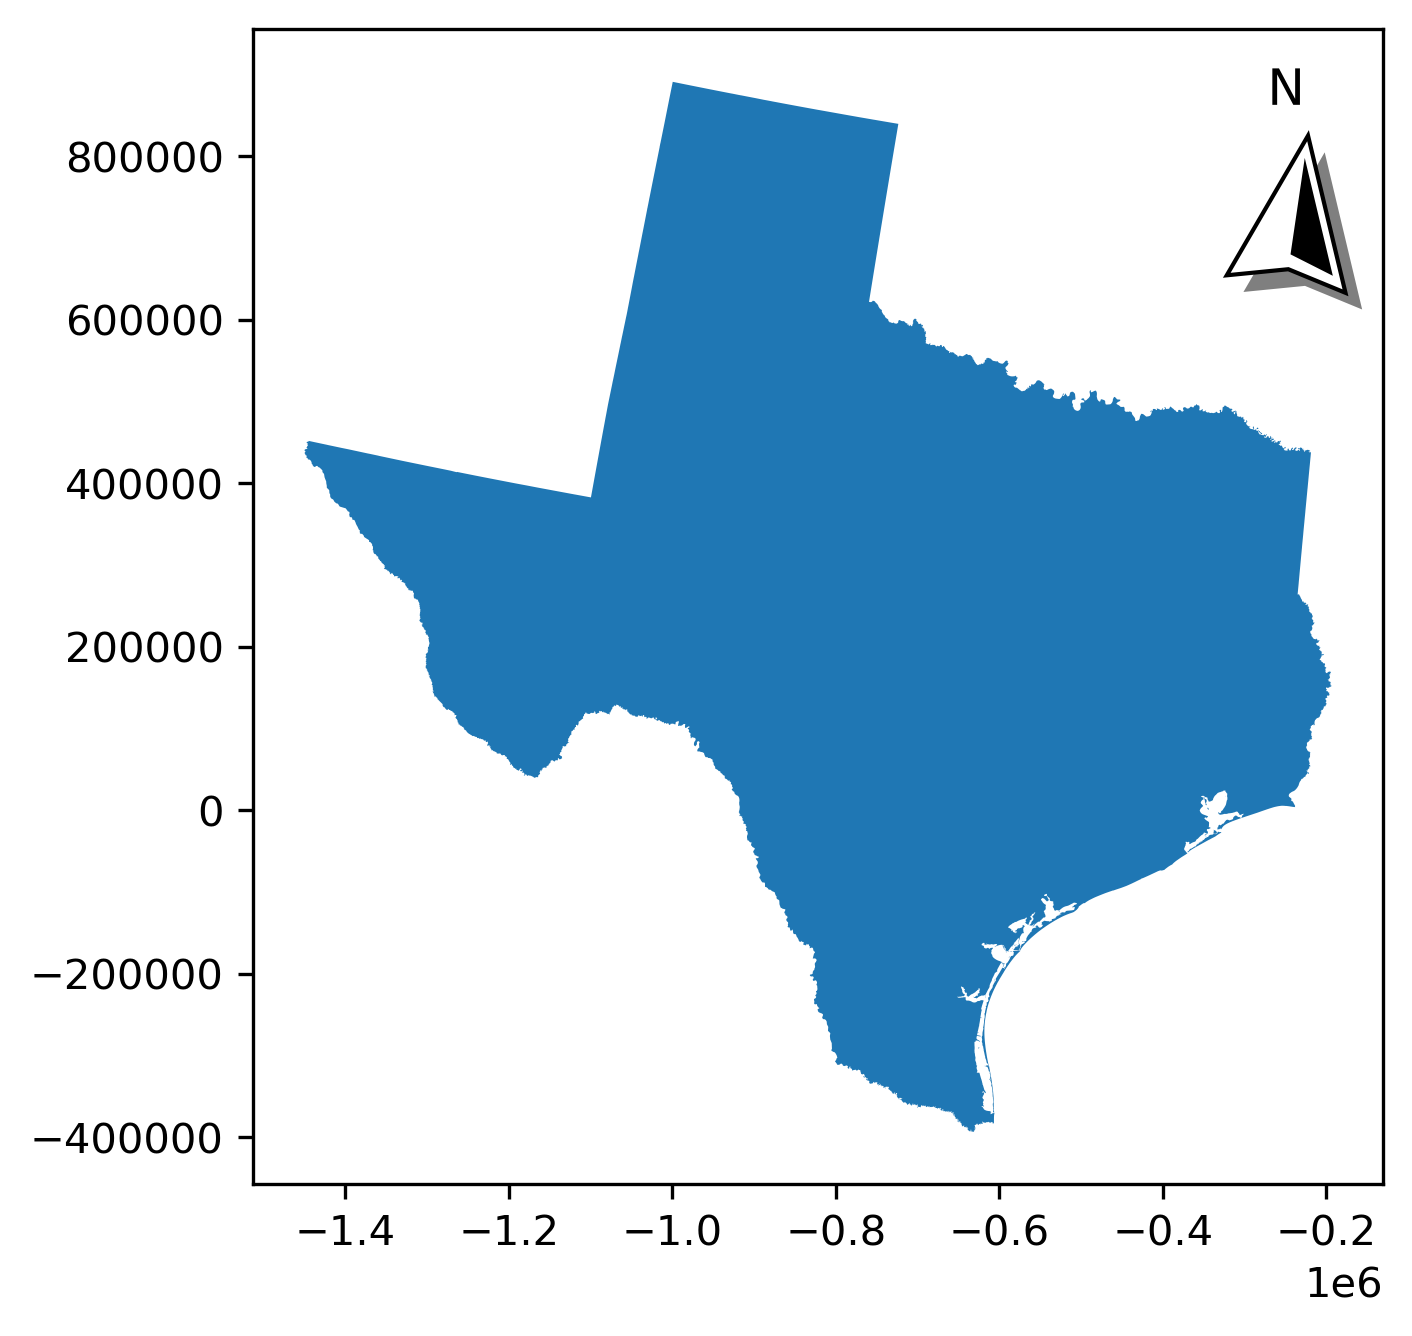

In [21]:
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5), dpi=300)
states.query("NAME=='Texas'").to_crs(3520).plot(ax=ax)
# print(states.query("NAME=='Georgia'").to_crs(3520).total_bounds)
_ = ax.add_artist(na.copy())
# aob = north_arrow.north_arrow(ax=ax,base_style={"crs":3520, "location":"upper right","rotation":0}, rotation_style={"degrees":120}, draw=True)
# aob = north_arrow.north_arrow(ax=ax, base_style={"crs":3520, "location":"upper right","rotation":0}, rotation_style={"crs":3520, "reference":"center"}, draw=True)
# aob = north_arrow.north_arrow(ax=ax, base_style={"crs":3520, "location":"upper right","rotation":0}, rotation_style={"crs":3520, "reference":"axis", "coords":(0.5,0.5)}, draw=True)
# aob = north_arrow.north_arrow(ax=ax, base_style={"crs":3520, "location":"upper right","rotation":0}, rotation_style={"crs":3520, "reference":"data", "coords":(-821874.35804335,248803.68956822)}, draw=True)

AttributeError: 'AnchoredOffsetbox' object has no attribute 'set_axis'

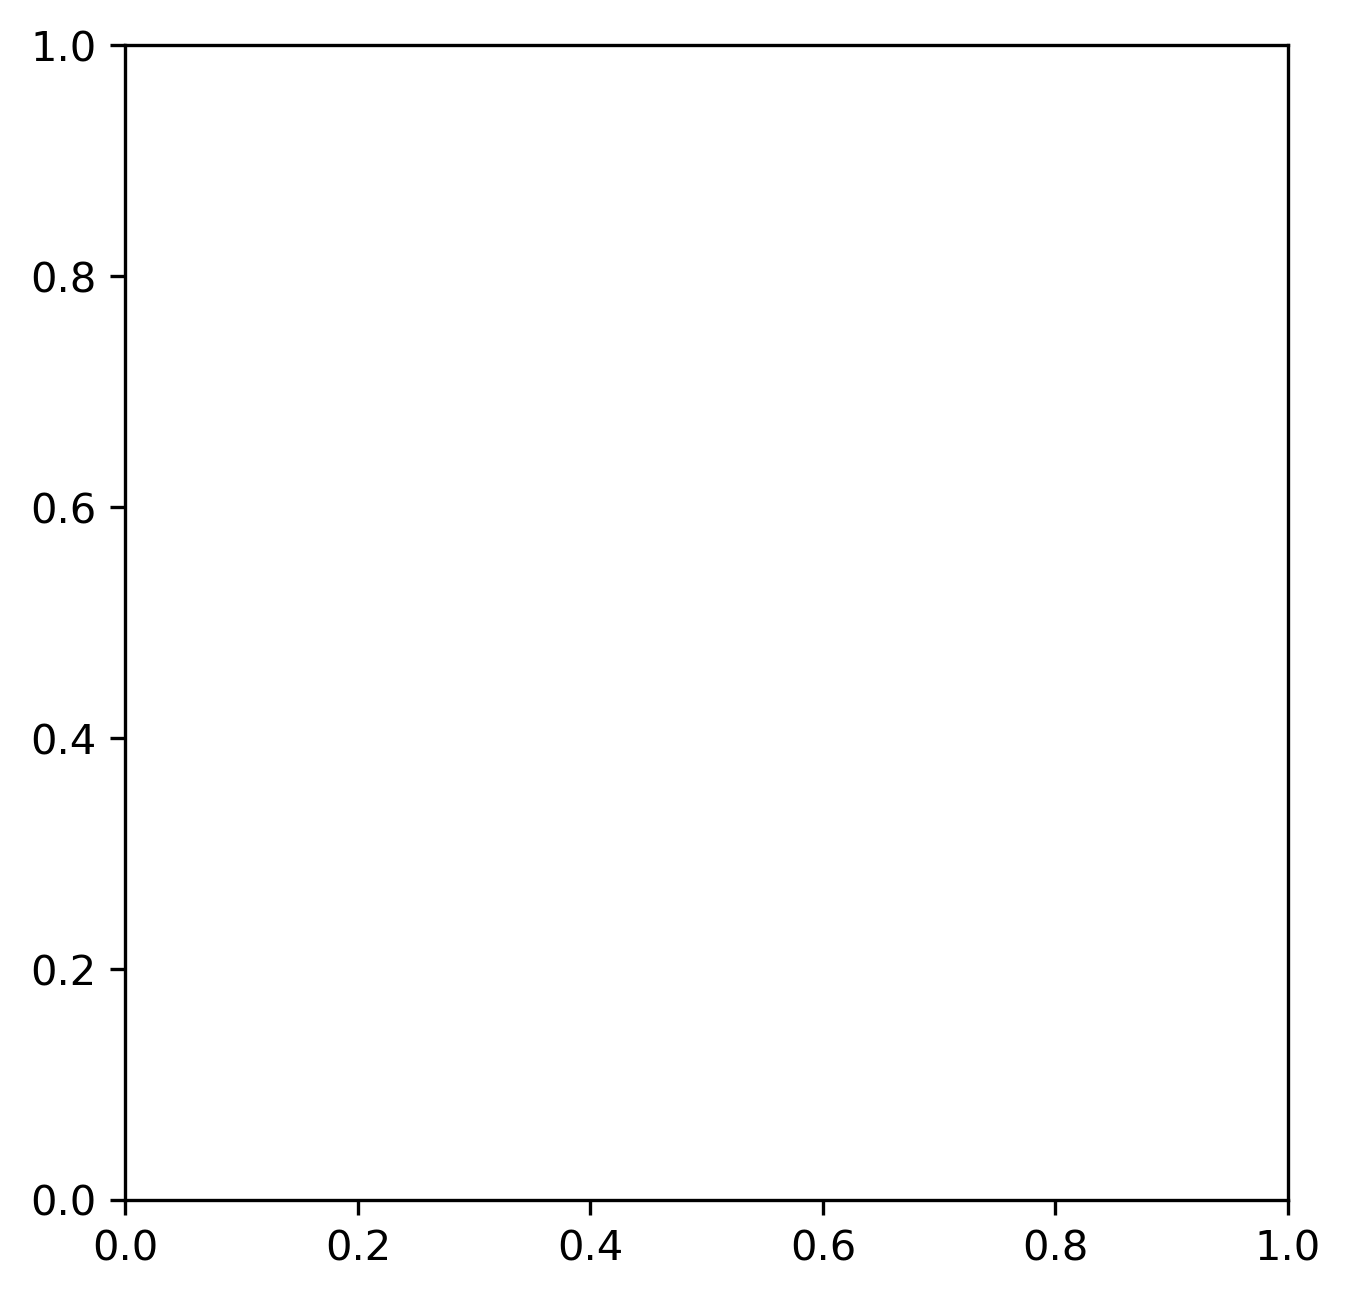

In [10]:
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(5,5), dpi=300)
# Create a generic triangle artist
triangle = matplotlib.patches.RegularPolygon((0.5,0.5), 3, radius=0.2)
# Create an offsetbox in data coordinates
offsetbox = matplotlib.offsetbox.AuxTransformBox(ax.transData)
# Place the triangle in the offsetbox
offsetbox.add_artist(triangle)
# Place the offsetbox in the AnchoredOffsetBox
container = matplotlib.offsetbox.AnchoredOffsetbox(loc="center", pad=0, child=offsetbox)
### NEW CODE ###
# Set the figure for the container
container.set_figure(fig)
container.set_axis(ax)
# Retrieve the renderer for the figure
renderer = fig._get_renderer()
fig.draw_without_rendering()
# Retrieve the bbox of the AnchoredOffsetBox in data coordinates
ax.transData.inverted().transform(container.get_window_extent(renderer))